## 0. Import the data and declare your package dependencies

In [5]:
# declare packages
import numpy as np
import pandas as pd

# Import the q1data.csv dataset
df = pd.read_csv('C:/Users/17202/OneDrive/Documents/MSBA/avocado_dataset.csv')

## Q1
Briefly describe the data set. What information does it contain?
* The avocados dataset contains sales information including date, amounts, product, and prices

## Q2
Clean the data in any way you see fit

In [6]:
# change number named columns to 'small_hass', 'large_hass', and 'xl_hass'
df = df.rename(columns={'4046': 'small_hass', '4225': 'large_hass', '4770': 'xl_hass'})

In [8]:
#  mapping 'geography' and making new column 'state'
geo_to_state = {
    'Albany' : 'New York',
    'Atlanta' : 'Georgia',
    'Baltimore/Washington' : 'Maryland',
    'Boise' : 'Idaho',
    'Buffalo/Rochester' : 'New York',
    'California' : 'California',
    'Chicago' : 'Illinois',
    'Cincinnati/Dayton' : 'Ohio',
    'Columbus' : 'Ohio',
    'Dallas/Ft. Worth' : 'Texas',
    'Denver' : 'Colorado',
    'Detroit' : 'Michigan',
    'Grand Rapids' : 'Michigan',
    'Great Lakes' : 'Illinois',
    'Harrisburg/Scranton' : 'Pennsylvania',
    'Hartford/Springfield' : 'Connecticut',
    'Houston' : 'Texas',
    'Indianapolis' : 'Indiana',
    'Jacksonville' : 'Florida',
    'Las Vegas' : 'Nevada',
    'Los Angeles' : 'California',
    'Louisville' : 'Kentucky',
    'Miami/Ft. Lauderdale' : 'Florida',
    'Midsouth' : '',
    'Nashville' : 'Tennesee',
    'New Orleans/Mobile' : 'Louisiana',
    'New York' : 'New York',
    'Northeast' : '',
    'Northern New England' : '',
    'Orlando' : 'Florida',
    'Philadelphia'
    'Phoenix/Tucson' : 'Arizona',
    'Pittsburgh' : 'Pennsylvania',
    'Plains' : '',
    'Portland' : 'Oregon',
    'Raleigh/Greensboro' : 'North Carolina',
    'Richmond/Norfolk' : 'Virginia',
    'Roanoke' : 'Virginia',
    'Sacramento' : 'California',
    'San Diego' : 'California',
    'San Francisco' : 'California',
    'Seattle' : 'Washington',
    'South Carolina' : 'South Carolina',
    'South Central' : '',
    'Southeast' : '',
    'Spokane' : 'Washington',
    'St. Louis' : 'Missouri',
    'Syracuse' : 'New York',
    'Tampa' : 'Florida',
    'Total U.S.' : '',
    'West' : '',
    'West Tex/New Mexico' : 'Texas'
}

df['state'] = df['geography'].replace(geo_to_state)

In [9]:

# mapping 'geography' to broader US regions and making new column 'region'
geo_to_region = {
    'Albany': 'Northeast',
    'Atlanta': 'Southeast',
    'Baltimore/Washington': 'Northeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'California': 'West',
    'Charlotte': 'Southeast',
    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Dallas/Ft. Worth': 'Southwest',
    'Denver': 'West',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Great Lakes',
    'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Houston': 'Southwest',
    'Indianapolis': 'Midwest',
    'Jacksonville': 'Southeast',
    'Las Vegas': 'Southwest',
    'Los Angeles': 'West',
    'Louisville': 'Midsouth',
    'Miami/Ft. Lauderdale': 'Southeast',
    'Midsouth': 'Midsouth',
    'Nashville': 'Midsouth',
    'New Orleans/Mobile': 'Midsouth',
    'New York': 'Northeast',
    'Northeast': 'Northeast',
    'Northern New England': 'Northeast',
    'Orlando': 'Southeast',
    'Philadelphia': 'Northeast',
    'Phoenix/Tucson': 'Southwest',
    'Pittsburgh': 'Northeast',
    'Plains': 'Plains',
    'Portland': 'West',
    'Raleigh/Greensboro': 'Southeast',
    'Richmond/Norfolk': 'Southeast',
    'Roanoke': 'Southeast',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'South Carolina': 'Southeast',
    'South Central': 'South Central',
    'Southeast': 'Southeast',
    'Spokane': 'West',
    'St. Louis': 'Midwest',
    'Syracuse': 'Northeast',
    'Tampa': 'Southeast',
    'Total U.S.': 'Other',
    'West': 'West',
    'West Tex/New Mexico': 'Southwest'
}

df['region'] = df['geography'].replace(geo_to_region)
df['region'] = df['region'].fillna('Unknown')

In [10]:
# rename 'geography' to 'city'
df.rename(columns={'geography': 'city'}, inplace=True)

In [11]:
# reduce double city values in 'city' to single values
df['city'] = df['city'].replace('Baltimore/Washington', 'Baltimore')
df['city'] = df['city'].replace('Buffalo/Rochester', 'Buffalo')
df['city'] = df['city'].replace('Dallas/Ft. Worth', 'Dallas')
df['city'] = df['city'].replace('Harrisburg/Scranton', 'Harrisburg')
df['city'] = df['city'].replace('Hartford/Springfield', "Hartford")
df['city'] = df['city'].replace('Miami/Ft. Lauderdale', 'Miami')
df['city'] = df['city'].replace('New Orleans/Mobile', 'New Orleans)')
df['city'] = df['city'].replace('Phoenix/Tucson', 'Phoenix')
df['city'] = df['city'].replace('Raleigh/Greensboro', 'Raleigh')
df['city'] = df['city'].replace('Richmond/Norfolk', 'Richmond')

In [12]:
# make new column for total US
total_to_bool = {
    'Total U.S.': True
}
df['total_US_bool'] = df['city'].replace(total_to_bool)

In [13]:
# bool mask for 'total_US_bool'
df['total_US_bool'] = df['total_US_bool'] == True

In [14]:
# Drop regions and tital U.S. in 'city'
drop_city = {
    'Northeast': '',
    'Plains': '',
    'West': '',
    'Great Lakes': '',
    'Midsouth': '',
    'South Central': '',
    'Southeast': '',
    'Total U.S.': '',
    'California': ''
}
df['city'] = [city if city not in drop_city else '' for city in df['city']]

## Q3
Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [15]:
# find sum of sh by region then calculate the max to get answer
northeast_sh_sales = df.loc[df['region'] == "Northeast", 'small_hass'].sum()
plains_sh_sales = df.loc[df['region'] == "Plains", 'small_hass'].sum()
west_sh_sales = df.loc[df['region'] == "West", 'small_hass'].sum()
greatlakes_sh_sales = df.loc[df['region'] == "Great Lakes", 'small_hass'].sum()
midsouth_sh_sales = df.loc[df['region'] == "Midsouth", 'small_hass'].sum()
southcentral_sh_sales = df.loc[df['region'] == "South Central", 'small_hass'].sum()
southeast_sh_sales = df.loc[df['region'] == "Southeast", 'small_hass'].sum()

sales_by_region = {
    'Northeast': northeast_sh_sales,
    'Plains': plains_sh_sales,
    'West': west_sh_sales,
    'Great Lakes': greatlakes_sh_sales,
    'Midsouth': midsouth_sh_sales,
    'South Central': southcentral_sh_sales,
    'Southeast': southeast_sh_sales
}

region_highest_sh_sales = max(sales_by_region, key=sales_by_region.get)
region_highest_sh_sales

'West'

## Q4
Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [16]:
# create new date variables
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [17]:
# find highest month sales
monthly_avg = df.groupby('month')['total_volume'].mean()
best_month = monthly_avg.idxmax()

print(best_month)
print("May is month 5")
print("May has the highest average volume of avocado sales")

5
May is month 5
May has the highest average volume of avocado sales


## Q5
Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable

In [18]:
# find highest city sales (remeber the first best_city would return a blank for .index[0] and .index[1] because total U.S. and california have been dropped as values from the column)
city_avg = df.groupby('city')['total_volume'].mean()
best_city = city_avg.sort_values(ascending=False).index[2]

print(best_city)
print(f"The metro region with the most avocado sales is {best_city}")

New York
The metro region with the most avocado sales is New York


In [19]:
# make top5 list
top_5 = city_avg.sort_values(ascending=False).index[2:7]
print(list(top_5))

['New York', 'Dallas', 'Houston', 'Phoenix', 'West Tex/New Mexico']


In [20]:
#make new top5 df
df_top5 = df[df['city'].isin(top_5)]

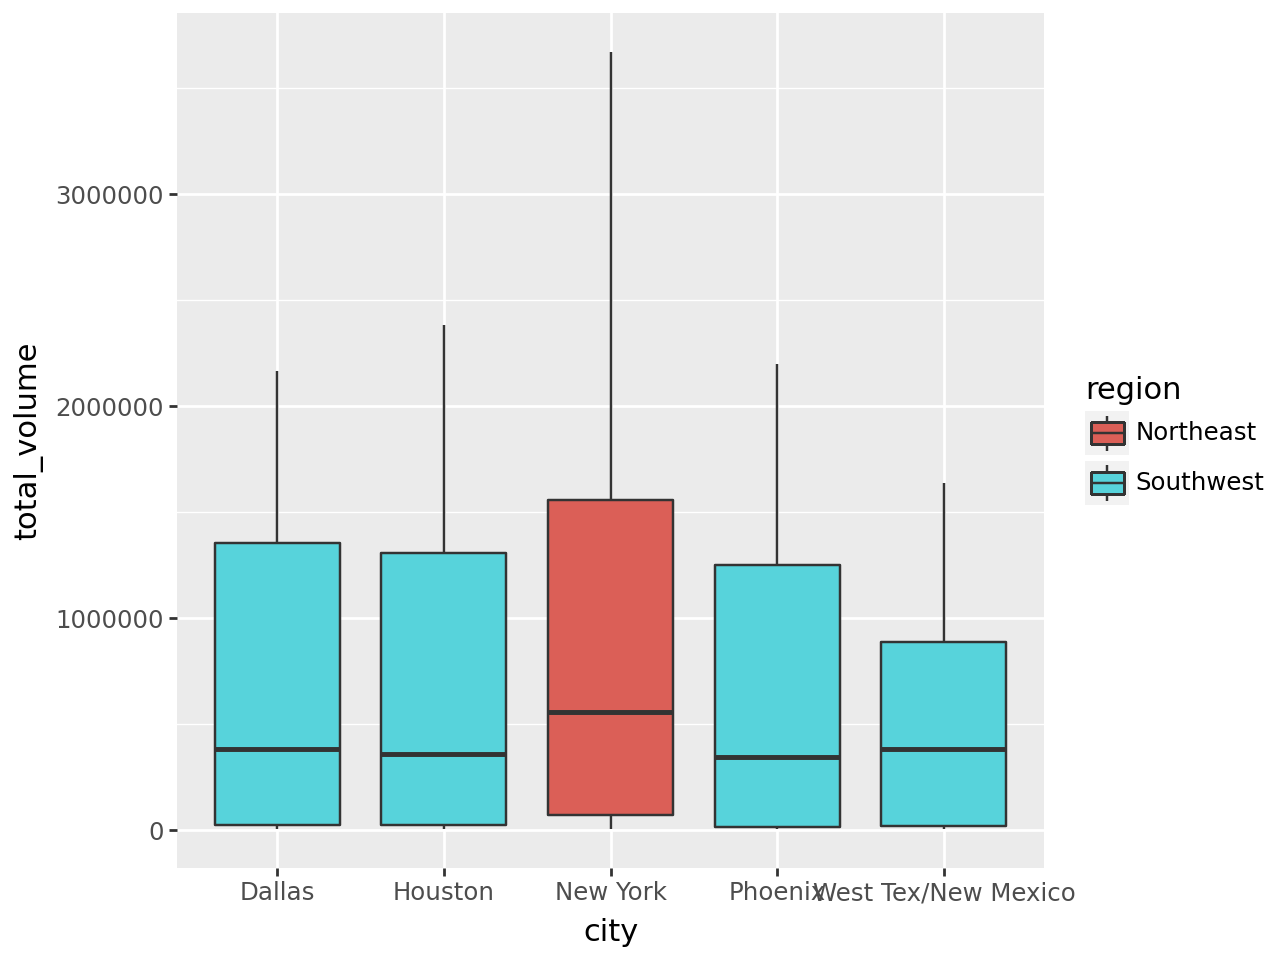

In [25]:
# create top5 box plots
from plotnine import ggplot, aes, geom_boxplot

(ggplot(df_top5,
aes(
  x = 'city',
  y = 'total_volume',
  fill = 'region'
))
+ geom_boxplot()
)

## Q6
From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only:
- "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

In [26]:
df_cali = df[df['city'].isin(["Los Angeles", "San Diego", "Sacramento", "San Francisco"])]

## Q7
In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization

In [27]:
# calculate price differences
la_org_price = df_cali[(df_cali['city'] == 'Los Angeles') & (df_cali['type'] == 'organic')]['average_price'].mean()
la_conv_price = df_cali[(df_cali['city'] == 'San Diego') & (df_cali['type'] == 'conventional')]['average_price'].mean()
la_price_dif = la_org_price - la_conv_price

sd_org_price = df_cali[(df_cali['city'] == 'San Diego') & (df_cali['type'] == 'organic')]['average_price'].mean()
sd_conv_price = df_cali[(df_cali['city'] == 'San Diego') & (df_cali['type'] == 'conventional')]['average_price'].mean()
sd_price_dif = sd_org_price - sd_conv_price

sac_org_price = df_cali[(df_cali['city'] == 'Sacramento') & (df_cali['type'] == 'organic')]['average_price'].mean()
sac_conv_price = df_cali[(df_cali['city'] == 'Sacramento') & (df_cali['type'] == 'conventional')]['average_price'].mean()
sac_price_dif = sac_org_price - sac_conv_price

sf_org_price = df_cali[(df_cali['city'] == 'San Francisco') & (df_cali['type'] == 'organic')]['average_price'].mean()
sf_conv_price = df_cali[(df_cali['city'] == 'San Francisco') & (df_cali['type'] == 'conventional')]['average_price'].mean()
sf_price_dif = sf_org_price - sf_conv_price

org_v_conv = [la_price_dif, sd_price_dif, sac_price_dif, sf_price_dif]
print(org_v_conv)
print(f"San Francisco has the most price difference between organic and conventional with a difference of {sf_price_dif}")

[0.461045751633987, 0.6845098039215689, 0.5784967320261438, 0.7189542483660132]
San Francisco has the most price difference between organic and conventional with a difference of 0.7189542483660132


In [28]:
type_summary = [['Los Angeles', la_org_price, la_conv_price, la_price_dif],
                      ['San Diego', sd_org_price, sd_conv_price, sd_price_dif],
                      ['Sacramento', sac_org_price, sac_conv_price, sac_price_dif],
                      ['San Francisco', sf_org_price, sf_conv_price, sf_price_dif]]
df_price = pd.DataFrame(type_summary,
                        columns=['city', 'org_prices', 'conv_prices', 'price_dif'])
df_price

,city,org_prices,conv_prices,price_dif
0,Los Angeles,1.574902,1.113856,0.461046
1,San Diego,1.798366,1.113856,0.684510
2,Sacramento,1.873856,1.295359,0.578497
3,San Francisco,2.119444,1.400490,0.718954


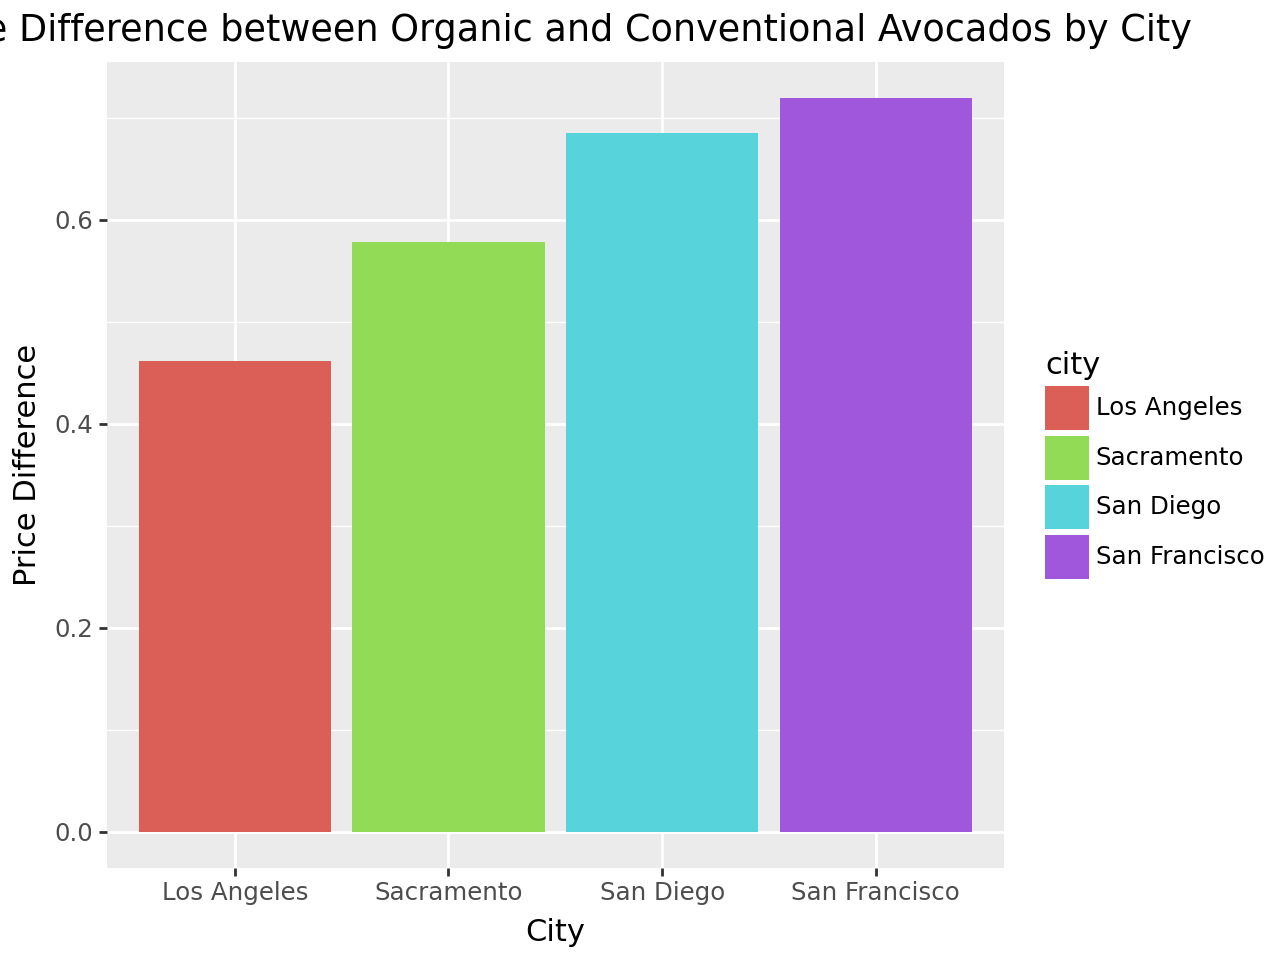

In [29]:
from plotnine import geom_bar, facet_wrap, scale_x_discrete, labs
(ggplot(df_price,
    aes(
        x='city',
        y='price_dif',
        fill='city'
    ))
 + geom_bar(stat='identity')
 + labs(title="Price Difference between Organic and Conventional Avocados by City",
        x="City",
        y="Price Difference")
)


## Q8
The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [35]:
df_cali

,date,average_price,total_volume,small_hass,large_hass,xl_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,city,state,region,total_US_bool,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,California,West,False,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,California,West,False,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,California,West,False,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,California,West,False,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,California,West,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,California,West,False,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,California,West,False,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,California,West,False,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,California,West,False,11,29


In [36]:
# First, melt the DataFrame to get a 'size' column
df_cali_melt = df_cali.melt(
    id_vars=['city', 'type', 'total_volume'],
    value_vars=['small_bags', 'large_bags', 'xlarge_bags'],
    var_name='size',
    value_name='sales'
)

df_cali_melt['proportion'] = df_cali_melt.groupby(['city', 'type'])['sales'].transform(lambda x: x / x.sum())
df_cali_melt

,city,type,total_volume,size,sales,proportion
0,Los Angeles,conventional,2682159.95,small_bags,215571.80,0.000533
1,Los Angeles,organic,54495.54,small_bags,5050.63,0.000254
2,Sacramento,conventional,430138.88,small_bags,39600.08,0.001509
3,Sacramento,organic,9213.49,small_bags,1158.45,0.000877
4,San Diego,conventional,461607.33,small_bags,30884.29,0.000445
...,...,...,...,...,...,...
7339,Sacramento,organic,23531.38,xlarge_bags,0.00,0.000000
7340,San Diego,conventional,469356.72,xlarge_bags,20604.81,0.000297
7341,San Diego,organic,25799.95,xlarge_bags,0.00,0.000000
7342,San Francisco,conventional,644141.37,xlarge_bags,6233.52,0.000112


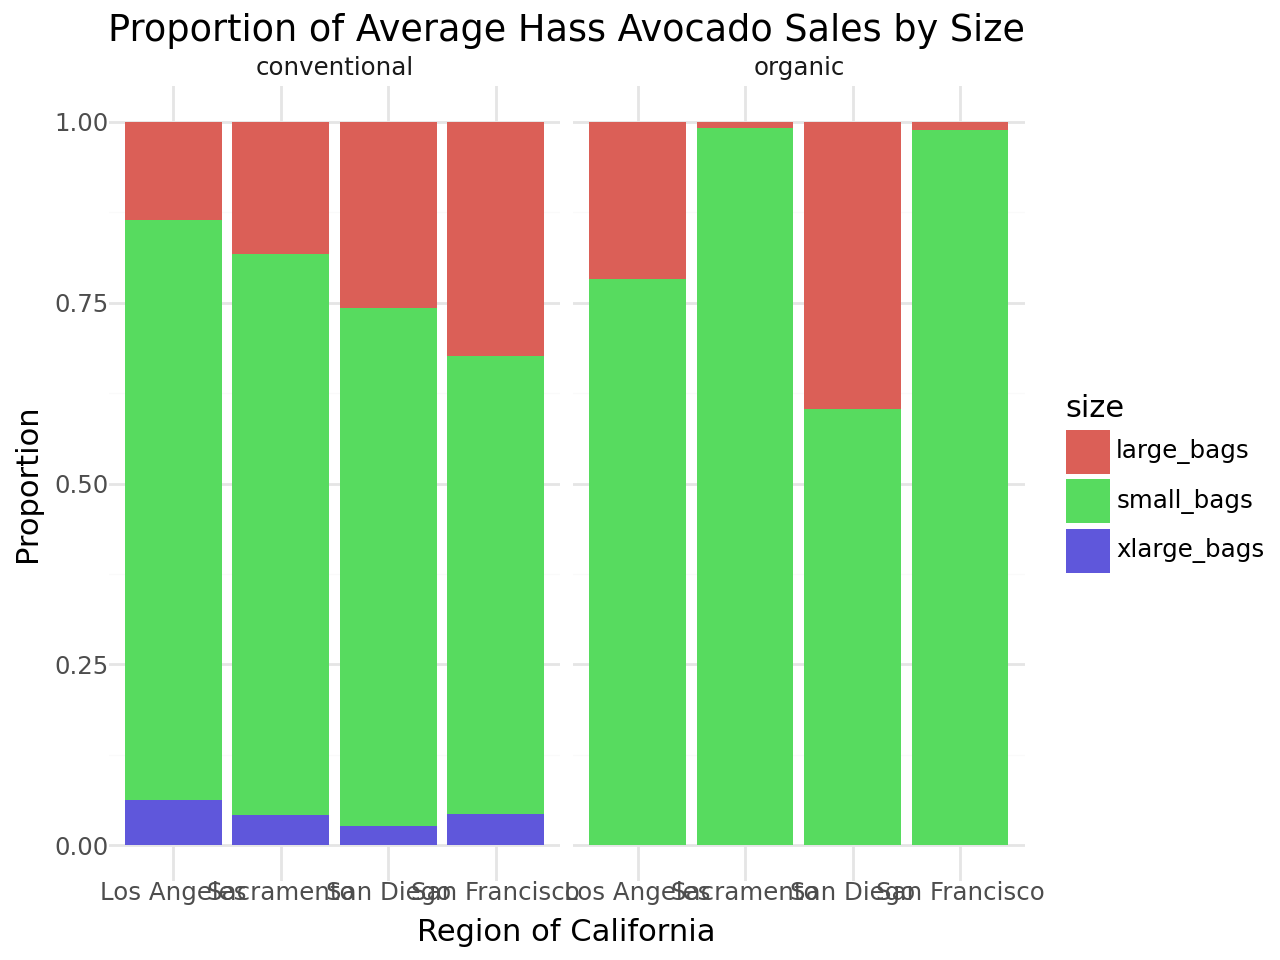

In [37]:
from plotnine import facet_grid, labs, theme_minimal

# Create the stacked bar plot
(ggplot(df_cali_melt, aes(
    x='city',
    y='proportion',
    fill='size'
    ))
+ geom_bar(stat='identity', position='fill')
+ facet_grid('. ~ type')
+ labs(title='Proportion of Average Hass Avocado Sales by Size', x='Region of California', y='Proportion')
+ theme_minimal()
)